# Library

In [ ]:
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

# Methods

In [2]:
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(file.read().splitlines())
    return stop_words

# Main

## Dataset

In [3]:
dataset = pd.read_json("dataset\Turkish_data_depository_630koseyazisi.jsonl",lines=True)
print(dataset.head(10))
print(dataset.info())

ValueError: Expected object or value

In [12]:
x = dataset.iloc[:, 2].values.astype("str") # author text
y = dataset.iloc[:, 0].values.astype("str") # author name

print(f"type x : {type(x)} , type y : {type(y)}")

type x : <class 'numpy.ndarray'> , type y : <class 'numpy.ndarray'>


## Preprocesing

In [17]:
import nltk
from nltk.corpus import wordnet, stopwords
nltk.download('stopwords')

# turkish stop words
stop_words =  load_stop_words("stopwordsTR\stopwords.txt")

# Her bir metni temizleme işlemi
for i in range(len(x)):
    # Convert to lowercase - Küçük harfe çevirme
    x[i] = x[i].lower()
    
    # Remove escape characters - Kaçış karakterlerini kaldırma
    x[i] = re.sub(r'[\r\n]', ' ', x[i]) 
    
    # Remove unnecessary characters - Gereksiz karakterleri kaldırma
    x[i] = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ\s]', '', x[i])
    
    # Remove stop words - Stop kelimeleri kaldırma
    x[i] = ' '.join([word for word in x[i].split() if word not in stop_words])
    
    # Remove punctuation marks - Noktalama işaretlerini kaldırma
    x[i] = x[i].translate(str.maketrans('', '', string.punctuation))
    
    # Remove repeating spaces - Tekrar eden boşlukları kaldırma
    x[i] = re.sub(r'\s+', ' ', x[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umitk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Convert to feature vector

# Yöntemler

## TF-IDF (Term Frequency-Inverse Document Frequency):
It is a statistical method used to measure the importance of words in text documents. TF-IDF vectors combine each word's frequency (TF) in the text and its rarity (IDF) across all documents.

Metin belgelerindeki kelimelerin önemini ölçmek için kullanılan bir istatistiksel yöntemdir. TF-IDF vektörleri, her kelimenin metindeki sıklığını (TF) ve tüm belgelerdeki nadirliğini (IDF) birleştirir.

In [18]:
# Create TF-IDF vector - TF-IDF vektörlerini oluşturma
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix = tfidf_vectorizer.fit_transform(x)

example_tfidf_vector = tfidf_matrix[0]
print("TF-IDF Vektörü (Örnek):", example_tfidf_vector)

TF-IDF Vektörü (Örnek):   (0, 17079)	0.06186254539557715
  (0, 32470)	0.0511575158034168
  (0, 25684)	0.05905933162262373
  (0, 19074)	0.040820233169889156
  (0, 43837)	0.03662262504905008
  (0, 37246)	0.06186254539557715
  (0, 3382)	0.06186254539557715
  (0, 35091)	0.023175473657450724
  (0, 12734)	0.03484605866534959
  (0, 8735)	0.06186254539557715
  (0, 27049)	0.0382062319024461
  (0, 41765)	0.052305209940066835
  (0, 51105)	0.03569390951786267
  (0, 46511)	0.02986850336649319
  (0, 12741)	0.04244803120041957
  (0, 36101)	0.05360635823803543
  (0, 11952)	0.03464514148833336
  (0, 14405)	0.06186254539557715
  (0, 52467)	0.04835430203046337
  (0, 46232)	0.026854434488219992
  (0, 53902)	0.05905933162262373
  (0, 10954)	0.03406611148733226
  (0, 5672)	0.041600180347906475
  (0, 18989)	0.05360635823803543
  (0, 17024)	0.0511575158034168
  :	:
  (0, 17335)	0.0511575158034168
  (0, 17174)	0.05360635823803543
  (0, 23968)	0.03898763033485278
  (0, 2576)	0.052305209940066835
  (0, 8069)	0.0

# SVM

SVM Modeli Doğruluğu: 0.2698412698412698


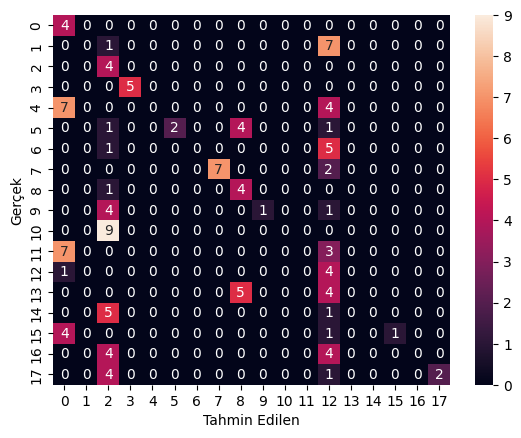

              precision    recall  f1-score   support

         aar       0.17      1.00      0.30         4
         bco       0.00      0.00      0.00         8
         cul       0.12      1.00      0.21         4
         cun       1.00      1.00      1.00         5
         ebr       0.00      0.00      0.00        11
         gur       1.00      0.25      0.40         8
         hin       0.00      0.00      0.00         6
         kaz       1.00      0.78      0.88         9
         lev       0.31      0.80      0.44         5
         msa       1.00      0.17      0.29         6
         oek       0.00      0.00      0.00         9
         psu       0.00      0.00      0.00        10
         sav       0.11      0.80      0.19         5
         tal       0.00      0.00      0.00         9
         ttu       0.00      0.00      0.00         6
         tug       1.00      0.17      0.29         6
         ved       0.00      0.00      0.00         8
         yba       1.00    

c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='rbf',gamma=2,C=1)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)


In [24]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Genişletilmiş hiperparametre aralığının tanımlanması
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.1, 1, 10]}

# Grid search modelinin oluşturulması
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')

# Grid search modelinin eğitilmesi
grid_search.fit(x_train, y_train)

# En iyi parametrelerin bulunması
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

En iyi parametreler: {'C': 1, 'gamma': 10, 'kernel': 'sigmoid'}


SVM Modeli Doğruluğu: 0.8492063492063492


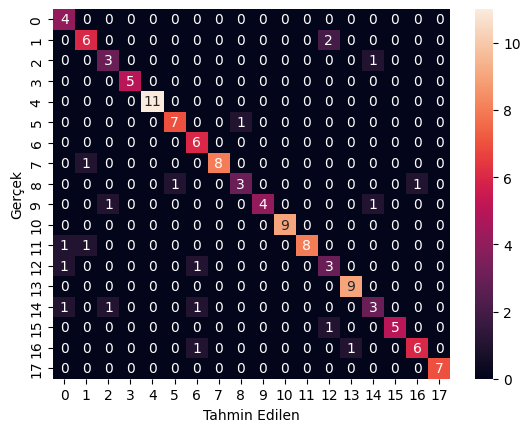

              precision    recall  f1-score   support

         aar       0.57      1.00      0.73         4
         bco       0.75      0.75      0.75         8
         cul       0.60      0.75      0.67         4
         cun       1.00      1.00      1.00         5
         ebr       1.00      1.00      1.00        11
         gur       0.88      0.88      0.88         8
         hin       0.67      1.00      0.80         6
         kaz       1.00      0.89      0.94         9
         lev       0.75      0.60      0.67         5
         msa       1.00      0.67      0.80         6
         oek       1.00      1.00      1.00         9
         psu       1.00      0.80      0.89        10
         sav       0.50      0.60      0.55         5
         tal       0.90      1.00      0.95         9
         ttu       0.60      0.50      0.55         6
         tug       1.00      0.83      0.91         6
         ved       0.86      0.75      0.80         8
         yba       1.00    

In [19]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='sigmoid',C=1,gamma=10)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)


In [27]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Genişletilmiş hiperparametre aralığının tanımlanması
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
              'class_weight': [None, 'balanced'],
              'decision_function_shape': ['ovo', 'ovr'],
              'max_iter': [100, 500, 1000]}


# Grid search modelinin oluşturulması
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')

# Grid search modelinin eğitilmesi
grid_search.fit(x_train, y_train)

# En iyi parametrelerin bulunması
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Umi

En iyi parametreler: {'C': 1, 'gamma': 10, 'kernel': 'sigmoid', 'max_iter': 500}


c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


c:\Users\Umitk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Modeli Doğruluğu: 0.8492063492063492


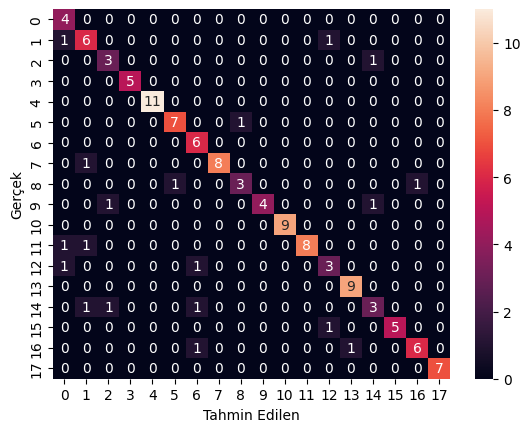

              precision    recall  f1-score   support

         aar       0.57      1.00      0.73         4
         bco       0.67      0.75      0.71         8
         cul       0.60      0.75      0.67         4
         cun       1.00      1.00      1.00         5
         ebr       1.00      1.00      1.00        11
         gur       0.88      0.88      0.88         8
         hin       0.67      1.00      0.80         6
         kaz       1.00      0.89      0.94         9
         lev       0.75      0.60      0.67         5
         msa       1.00      0.67      0.80         6
         oek       1.00      1.00      1.00         9
         psu       1.00      0.80      0.89        10
         sav       0.60      0.60      0.60         5
         tal       0.90      1.00      0.95         9
         ttu       0.60      0.50      0.55         6
         tug       1.00      0.83      0.91         6
         ved       0.86      0.75      0.80         8
         yba       1.00    

In [9]:
# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='sigmoid',C=1,gamma=10,max_iter=500)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)
